# **Fake or True - News Classification**



The project below deals with the problem of text data classification - news classification to be exact. The data includes a sample of data classified as genuine news, and a sample of data classified as fake. During the course of the project, the data was explored to determine their quality and characteristics, and then appropriately processed to transform them into vector form. In the last part of the project, some Machine Learning methos were aplied for data classification.

The data comes from the election period and one year after the 2016 US elections, and concerns mainly political topics.

## **Table of contents**

**Fake or True - News Classification**
1. Table of contents
2. Libraries import
3. Data import
4. Data exploration
  - Data overview
  - Duplicates removing
  - Missing values checking
  - News length
  - Average number of words in each text
  - Histogram of words number in texts
  - Subjects overview
5. Text data cleaning and processing
  - Tokenization
  - Lemmatization
  - Addidtional cleaning after lemmatizaton
6. Plots
  - Average word length histogram
  - Words number in articles histogram
  - Word Cloud
7. Train and test split
8. Vectorizing
9. Models comparison
  - Logistic Regression
  - Logistic Regression - grid search for best parameters
  - Decision Tree
  - Decision Tree - grid search for best parameters
  - Random Forest
  - Random Forest - grid search for best parameters
  - Support Vector Machines
  - SVM - grid search for best parameters
  - Naive Bayes
  - Boosting - Ada Boost
  - Bagging - Decision Tree Classfier
10. Results comparison
   - Results bar plot
11. Conclusions











## **Libraries import**

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import regex as re
import string
import seaborn as sns
import matplotlib.pyplot as plt
#string.punctuation

# Text data processing
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import SpaceTokenizer
space_tokenizer = SpaceTokenizer()
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Data import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_true=pd.read_csv('drive/My Drive/News/True.csv')
df_fake=pd.read_csv('drive/My Drive/News/Fake.csv')

## **Data exploration**

###Data overview

In the first step of data mining, a comparison of the data structure (df_true and df_fake) in both sets: columns, number of records, etc., as well as checking for missing data, duplicates and their possible removal.

In [ ]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
df_true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [ ]:
df_fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

As you can see above, both data sets have the same structure: the same column names and their type.

###Duplicates removing

In [ ]:
df_true.describe()

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182

As can be seen from the above summary of df_true data, in the column which is the target object of analysis and classification - the "text" column, there are duplicates (the number of texts is greater than the number of unique texts). In the next step, we remove duplicates.

In [ ]:
df_true.drop_duplicates(subset=[ 'text'], keep='last', inplace=True)

Similarly for the 'df_fake' data - also in the "text" column there are duplicates and we also delete them.

In [ ]:
df_fake.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

In [ ]:
df_fake.drop_duplicates(subset=[ 'text'], keep='last', inplace=True)

###Missing values checking

In [ ]:
df_true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

There are no missing data in both samples.

###News length

In [ ]:
print("True news length:", len(df_true), 
      "Fake news length:",len(df_fake))


True news length: 21192 Fake news length: 17455


Both datasets are of similar length - have similar number of observation. For this reason, oversampling of fake data news has been abandoned. 



Concating both data samples to one

In [ ]:
# Add a "class" column to each set
df_true['class'] = 1
df_fake['class'] = 0


In [ ]:
# Concatening both data frames
data = pd.concat([df_true, df_fake])

###Average number of words in each text

In [ ]:
# Average number of words for each text per class
data['words_num'] = data['text'].apply(lambda x: len(str(x).split()))
print("True news average number of words in text: ", "{:.2f}".format(data[data['class']==1]['words_num'].mean()) )
print("Fake news average number of words in text: ", "{:.2f}".format(data[data['class']==0]['words_num'].mean()))

True news average number of words in text:  384.81
Fake news average number of words in text:  425.26


On average, fake news is longer text than real news.

###Histogram of words number in texts

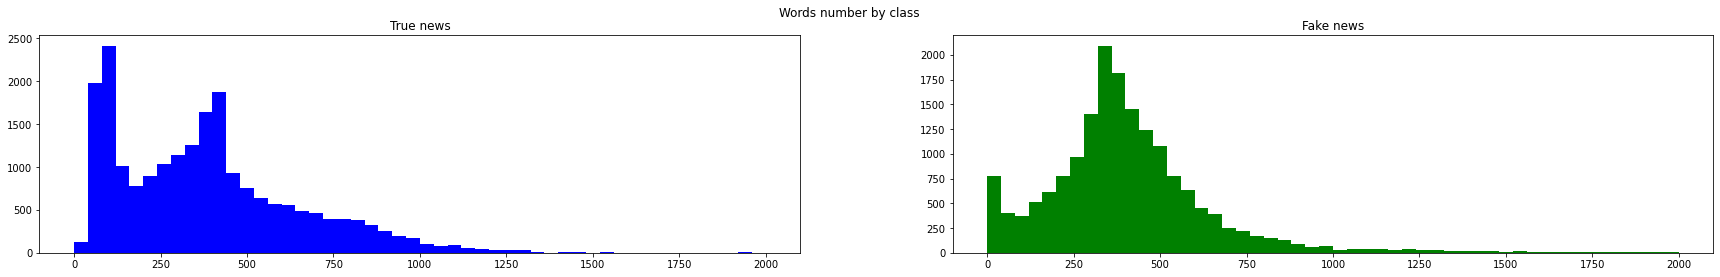

In [ ]:
fig,(x1,x2)=plt.subplots(1,2,figsize=(30,4))
data_words=data[data['class']==1]['words_num']
x1.hist(data_words,color='blue', bins=50, range=(0,2000))
x1.set_title('True news')
data_words=data[data['class']==0]['words_num']
x2.hist(data_words,color='green', bins=50, range=(0,2000))
x2.set_title('Fake news')
fig.suptitle('Words number by class')
plt.show()

Based on the histograms above, it can be judged that the word count distribution in "Fake news" is closer to the normal distribution than for "True news".

In [ ]:
data.groupby(['class']).describe()

words_num                                                          
          count        mean         std  min    25%    50%    75%     max
class                                                                    
0       17455.0  425.257118  355.197306  0.0  277.0  376.0  503.0  8135.0
1       21192.0  384.812760  273.789538  0.0  147.0  359.0  523.0  5172.0

Fake news on average has a higher number of words in the text.

### Subjects overview

In [ ]:
# present all subjects with its frequency
data['subject'].value_counts()

politicsNews       11203
worldnews           9989
News                9050
left-news           4305
politics            2361
Government News      956
Middle-east          778
US_News                5
Name: subject, dtype: int64

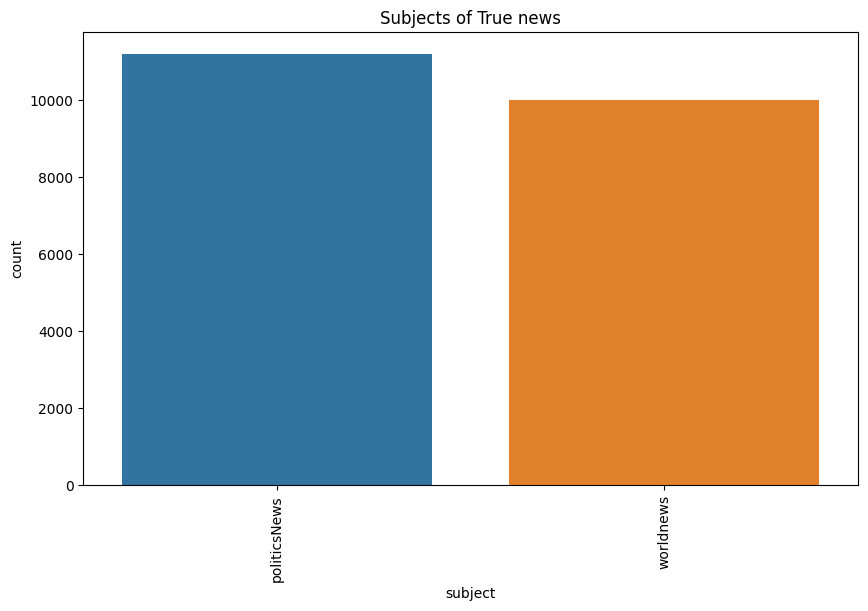

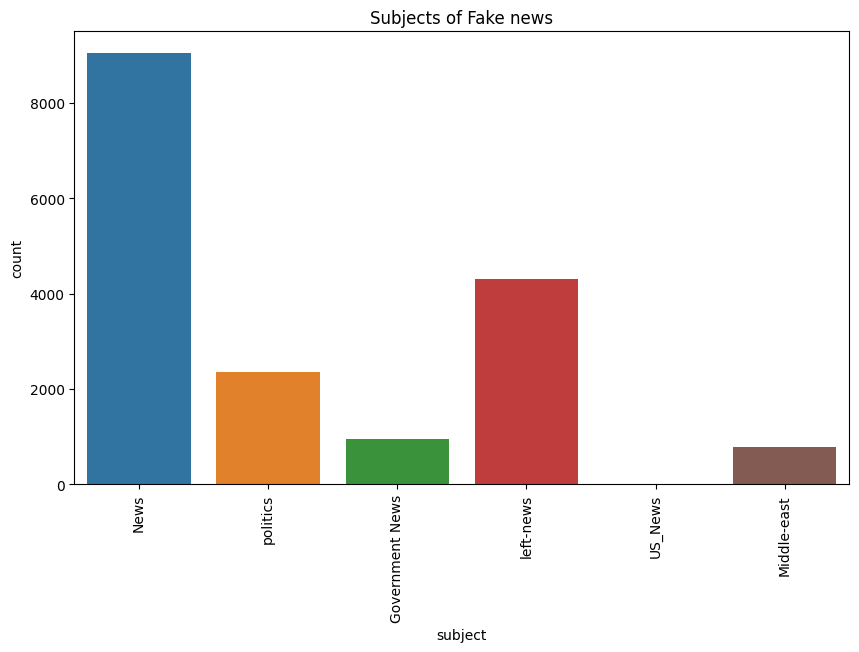

In [ ]:
# Subject column countplot
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(data=df_true,x='subject')
plt.xticks(rotation=90);
plt.title("Subjects of True news")
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(data=df_fake,x='subject')
plt.xticks(rotation=90);
plt.title("Subjects of Fake news")

plt.show()

It can be concluded that the topics for both classes are disjoint sets. The use of the "subject" variable does not makes sense in relation to the exercise that is the subject of this work

In [ ]:
data.drop(['subject', 'title', 'words_num', 'date'], axis = 1, inplace=True)


##Text data cleaning and processing

The following steps will be performed in the data cleansing step:
 - Removing punctuations like . , ! $( ) * % @ 
 - Removing URLs
 - Lower casing
 - Tokenization
 - Lemmatization

In [ ]:
def text_cleaning(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) 
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = text.lower()
    return text

In [ ]:
data.head()

text  class
0  WASHINGTON (Reuters) - The head of a conservat...      1
1  WASHINGTON (Reuters) - Transgender people will...      1
2  WASHINGTON (Reuters) - The special counsel inv...      1
3  WASHINGTON (Reuters) - Trump campaign adviser ...      1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      1

In [ ]:
data["text"] = data["text"].apply(text_cleaning)

In [ ]:
data.head()

text  class
0  washington  reuters    the head of a conservat...      1
1  washington  reuters    transgender people will...      1
2  washington  reuters    the special counsel inv...      1
3  washington  reuters    trump campaign adviser ...      1
4  seattle washington  reuters    president donal...      1

### **Tokenization**

In [ ]:
from nltk.tokenize import SpaceTokenizer
space_tokenizer = SpaceTokenizer()
data['text_new'] = [space_tokenizer.tokenize(a) for a in data['text']]

In [ ]:
data.head()

text  class  \
0  washington  reuters    the head of a conservat...      1   
1  washington  reuters    transgender people will...      1   
2  washington  reuters    the special counsel inv...      1   
3  washington  reuters    trump campaign adviser ...      1   
4  seattle washington  reuters    president donal...      1   

                                            text_new  
0  [washington, , reuters, , , , the, head, of, a...  
1  [washington, , reuters, , , , transgender, peo...  
2  [washington, , reuters, , , , the, special, co...  
3  [washington, , reuters, , , , trump, campaign,...  
4  [seattle, washington, , reuters, , , , preside...

In [ ]:
import nltk
from nltk.corpus import stopwords
stoplist= set(stopwords.words('english'))

In [ ]:
# Stopwords removing
data['text_flt'] = [[word for word in art if word not in stoplist] for art in data['text_new']]


In [ ]:
data.head()

text  class  \
0  washington  reuters    the head of a conservat...      1   
1  washington  reuters    transgender people will...      1   
2  washington  reuters    the special counsel inv...      1   
3  washington  reuters    trump campaign adviser ...      1   
4  seattle washington  reuters    president donal...      1   

                                            text_new  \
0  [washington, , reuters, , , , the, head, of, a...   
1  [washington, , reuters, , , , transgender, peo...   
2  [washington, , reuters, , , , the, special, co...   
3  [washington, , reuters, , , , trump, campaign,...   
4  [seattle, washington, , reuters, , , , preside...   

                                            text_flt  
0  [washington, , reuters, , , , head, conservati...  
1  [washington, , reuters, , , , transgender, peo...  
2  [washington, , reuters, , , , special, counsel...  
3  [washington, , reuters, , , , trump, campaign,...  
4  [seattle, washington, , reuters, , , , preside...

In [ ]:
data_new = data.filter(['class','text_flt'], axis=1)

In [ ]:
data_new.head()

class                                           text_flt
0      1  [washington, , reuters, , , , head, conservati...
1      1  [washington, , reuters, , , , transgender, peo...
2      1  [washington, , reuters, , , , special, counsel...
3      1  [washington, , reuters, , , , trump, campaign,...
4      1  [seattle, washington, , reuters, , , , preside...

In [ ]:
data = data_new

**Shuffling data**

In [ ]:
#shuffling
data = data.sample(frac = 1)
# resetting the index values
data.reset_index(inplace=True, drop=True)

In [ ]:
data.head()

class                                           text_flt
0      1  [chicago, , reuters, , , , u, , congresswoman,...
1      0  [lowest, point, jeb, bush, political, career, ...
2      0                    [unreal, , , would, appear, , ]
3      1  [moscow, , reuters, , , , u, , decision, suppl...
4      0  [big, government, never, efficient, perfect, e...

### **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemat(x):
  y = lemmatizer.lemmatize(x)
  return y

In [ ]:
data['text_lem'] = [[lemmatizer.lemmatize(word) for word in art] for art in data['text_flt']]

In [ ]:
data.head()

class                                           text_flt  \
0      1  [columbia, , c, , , reuters, , , , riding, hig...   
1      1  [manila, , reuters, , , , philippine, presiden...   
2      1  [washington, , reuters, , , , secret, meeting,...   
3      1  [phnom, penh, , reuters, , , , cambodian, gove...   
4      0  [donald, trump, decided, make, way, mexico, we...   

                                            text_lem  
0  [columbia, , c, , , reuters, , , , riding, hig...  
1  [manila, , reuters, , , , philippine, presiden...  
2  [washington, , reuters, , , , secret, meeting,...  
3  [phnom, penh, , reuters, , , , cambodian, gove...  
4  [donald, trump, decided, make, way, mexico, we...

In [ ]:
data = data[['class','text_lem']]

In [ ]:
data.head()

class                                           text_lem
0      1  [columbia, , c, , , reuters, , , , riding, hig...
1      1  [manila, , reuters, , , , philippine, presiden...
2      1  [washington, , reuters, , , , secret, meeting,...
3      1  [phnom, penh, , reuters, , , , cambodian, gove...
4      0  [donald, trump, decided, make, way, mexico, we...

### Addidtional cleaning after lemmatizaton

In [ ]:
#Delete very short words (shorter than 3 characters)

data['text_long'] = [[re.sub(r'\b\w{1,3}\b', '', c) for c in art] for art in data['text_lem']] 

In [ ]:
#Delete empty elements 

data['text_long'] = [[c for c in art if c] for art in data['text_long']]

In [ ]:
data.head()

class                                           text_lem  \
0      1  [columbia, , c, , , reuters, , , , riding, hig...   
1      1  [manila, , reuters, , , , philippine, presiden...   
2      1  [washington, , reuters, , , , secret, meeting,...   
3      1  [phnom, penh, , reuters, , , , cambodian, gove...   
4      0  [donald, trump, decided, make, way, mexico, we...   

                                           text_long  
0  [columbia, reuters, riding, high, landslide, v...  
1  [manila, reuters, philippine, president, rodri...  
2  [washington, reuters, secret, meeting, neighbo...  
3  [phnom, penh, reuters, cambodian, government, ...  
4  [donald, trump, decided, make, mexico, wednesd...

In [ ]:
data['text_new'] = [' '.join([str(elem) for elem in art]) for art in data['text_long']] 

In [ ]:
data.head()

class                                           text_lem  \
0      1  [columbia, , c, , , reuters, , , , riding, hig...   
1      1  [manila, , reuters, , , , philippine, presiden...   
2      1  [washington, , reuters, , , , secret, meeting,...   
3      1  [phnom, penh, , reuters, , , , cambodian, gove...   
4      0  [donald, trump, decided, make, way, mexico, we...   

                                           text_long  \
0  [columbia, reuters, riding, high, landslide, v...   
1  [manila, reuters, philippine, president, rodri...   
2  [washington, reuters, secret, meeting, neighbo...   
3  [phnom, penh, reuters, cambodian, government, ...   
4  [donald, trump, decided, make, mexico, wednesd...   

                                            text_new  
0  columbia reuters riding high landslide victory...  
1  manila reuters philippine president rodrigo du...  
2  washington reuters secret meeting neighbor hou...  
3  phnom penh reuters cambodian government lawyer...  
4  donald trump decided make mexico wednesday mee...

## Plots

### Average word length histogram

In [ ]:
#Calculate length of each word
data['words_len'] = [[len(x) for x in art] for art in data['text_long']]


In [ ]:
# Definition of function "average" for list
def avg(lista):
  if len(lista)>0:
    return sum(lista) / len(lista)

In [ ]:
data['word_len'] = [(avg(art)) for art in data['words_len']]

In [ ]:
data.head()

class                                           text_lem  \
0      1  [columbia, , c, , , reuters, , , , riding, hig...   
1      1  [manila, , reuters, , , , philippine, presiden...   
2      1  [washington, , reuters, , , , secret, meeting,...   
3      1  [phnom, penh, , reuters, , , , cambodian, gove...   
4      0  [donald, trump, decided, make, way, mexico, we...   

                                           text_long  \
0  [columbia, reuters, riding, high, landslide, v...   
1  [manila, reuters, philippine, president, rodri...   
2  [washington, reuters, secret, meeting, neighbo...   
3  [phnom, penh, reuters, cambodian, government, ...   
4  [donald, trump, decided, make, mexico, wednesd...   

                                            text_new  \
0  columbia reuters riding high landslide victory...   
1  manila reuters philippine president rodrigo du...   
2  washington reuters secret meeting neighbor hou...   
3  phnom penh reuters cambodian government lawyer...   
4  donald trump decided make mexico wednesday mee...   

                                           words_len  word_len  
0  [8, 7, 6, 4, 9, 7, 8, 5, 8, 7, 10, 5, 6, 7, 7,...  6.481579  
1  [6, 7, 10, 9, 7, 7, 4, 6, 5, 4, 9, 6, 5, 9, 4,...  6.460000  
2  [10, 7, 6, 7, 8, 5, 5, 4, 7, 4, 11, 6, 8, 6, 5...  6.460905  
3  [5, 4, 7, 9, 10, 6, 5, 7, 6, 6, 11, 4, 10, 5, ...  6.791209  
4  [6, 5, 7, 4, 6, 9, 7, 9, 7, 4, 5, 7, 6, 5, 4, ...  6.623482

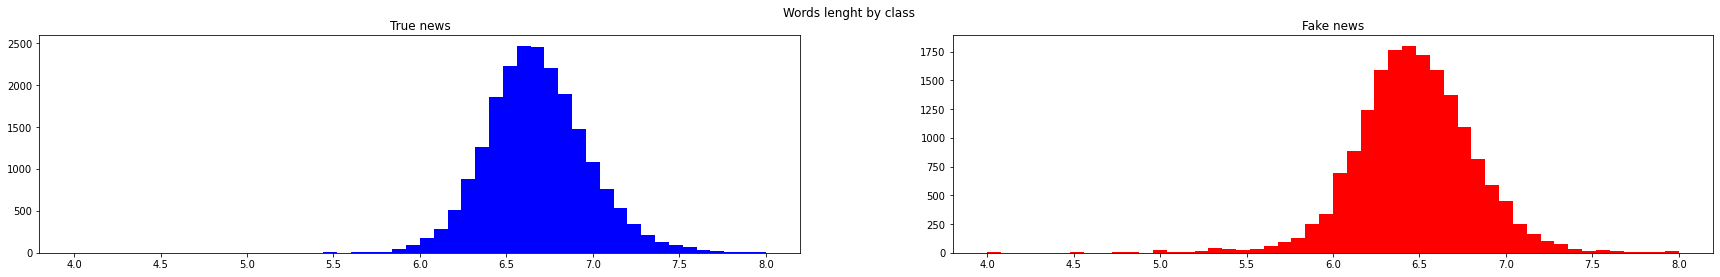

In [ ]:
fig,(x1,x2)=plt.subplots(1,2,figsize=(30,4))
data_words=data[data['class']==1]['word_len']
x1.hist(data_words,color='blue', bins=50, range=(4,8))
x1.set_title('True news')
data_words=data[data['class']==0]['word_len']
x2.hist(data_words,color='red', bins=50, range=(4,8))
x2.set_title('Fake news')
fig.suptitle('Words lenght by class')
plt.show()

### Words number in articles histogram

In [ ]:
data['word_count'] = [(len(art)) for art in data['text_long']]

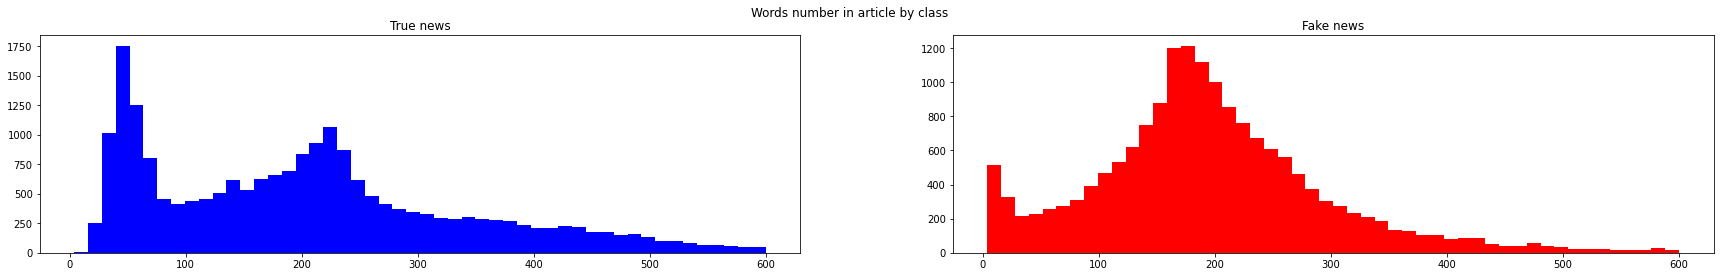

In [ ]:
fig,(x1,x2)=plt.subplots(1,2,figsize=(30,4))
data_words=data[data['class']==1]['word_count']
x1.hist(data_words,color='blue', bins=50, range=(4,600))
x1.set_title('True news')
data_words=data[data['class']==0]['word_count']
x2.hist(data_words,color='red', bins=50, range=(4,600))
x2.set_title('Fake news')
fig.suptitle('Words number in article by class')
plt.show()

###**Word Cloud**

In [ ]:
# Create text as concateted all texts in column 'text_new'

text = data['text_new']
news = str()
for i in text:
  news = news + i

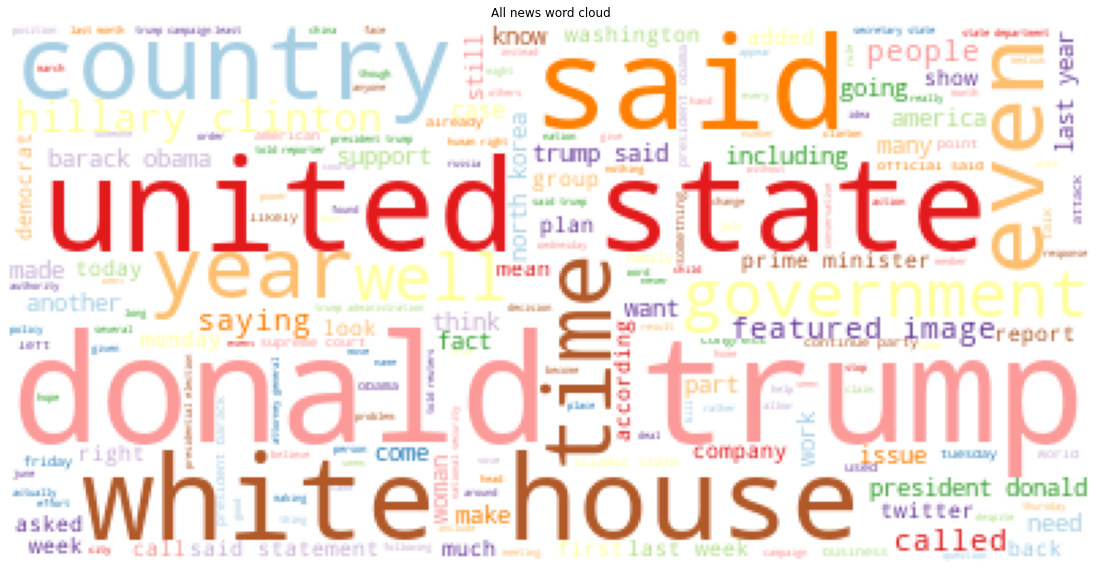

In [ ]:
# print Word Cloud plot for all text in data

plt.figure(figsize=(20, 10))
wordcloud = WordCloud(max_font_size=80, max_words=1000, background_color='white', colormap='Paired').generate(news)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('All news word cloud')
plt.show()

In [ ]:
# Create text as concateted all texts in column 'text_new' for class 1 - "True news"

text = data[data['class']==1]['text_new']
news_true = str()
for i in text:
  news_true = news_true + i

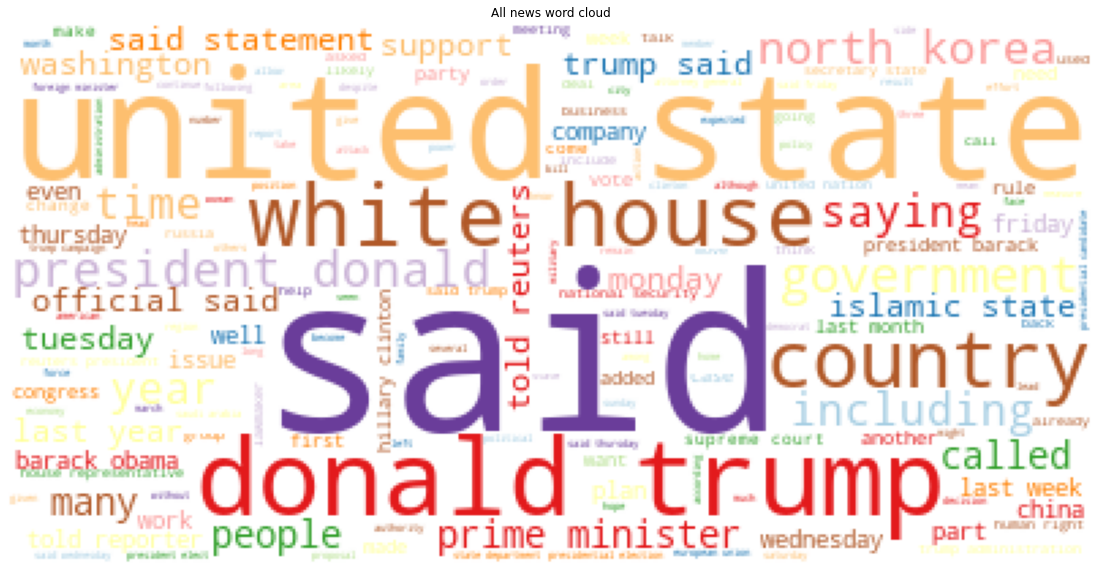

In [ ]:
# print Word Cloud plot for all texts in column 'text_new' for class  1 - "True news"

plt.figure(figsize=(20, 10))
wordcloud = WordCloud(max_font_size=80, max_words=1000, background_color='white', colormap='Paired').generate(news_true)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('All news word cloud')
plt.show()

In [ ]:
# Create text as concateted all texts in column 'text_new' for class 0 - "Fake news"

text = data[data['class']==0]['text_new']
news_fake = str()
for i in text:
  news_fake = news_fake + i

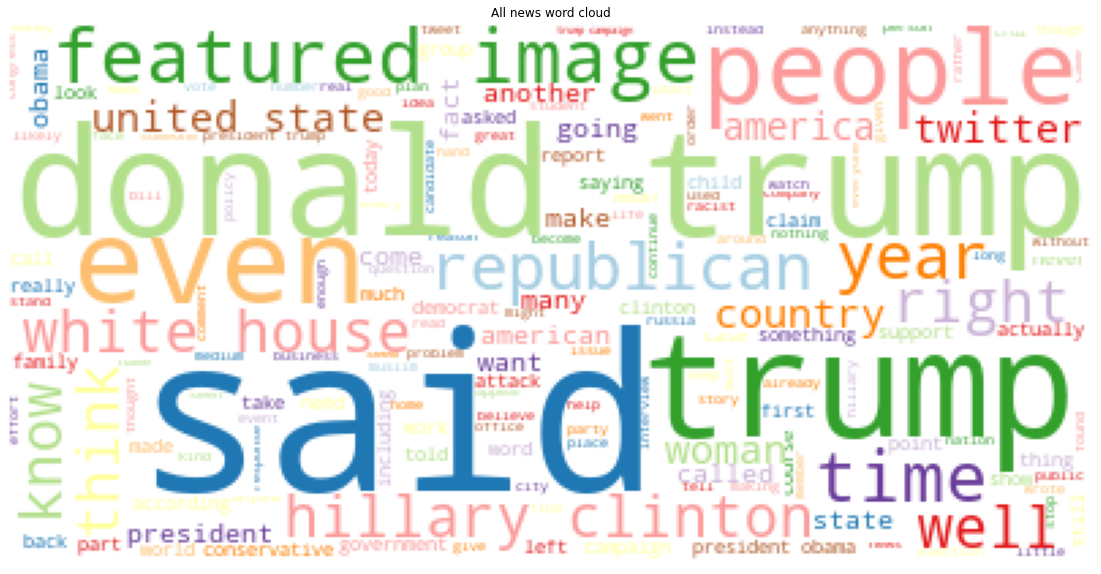

In [ ]:
# print Word Cloud plot for all texts in column 'text_new' for class 0 - "Fake news"

plt.figure(figsize=(20, 10))
wordcloud = WordCloud(max_font_size=80, max_words=1000, background_color='white', colormap='Paired').generate(news_fake)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('All news word cloud')
plt.show()

## **Train and test split**

The data is divided into a training group and a test group so that in both these groups there is an appropriate proportion of each class ("fake" and true").

In [ ]:
x = data["text_new"]
y = data["class"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

## **Vectorizing**

The Tf-idf term weighting method was used in the vectorization process.

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
idf = vectorization.idf_
dic = dict(zip(vectorization.get_feature_names(), idf))
print(dic)

{'aaaaaaaand': 10.645946636996333, 'aaaaackkk': 10.645946636996333, 'aaaaapkfhk': 10.645946636996333, 'aaaahhhh': 10.645946636996333, 'aaaand': 10.645946636996333, 'aaaarrgh': 10.645946636996333, 'aaarf': 10.645946636996333, 'aaba': 10.645946636996333, 'aabo': 10.645946636996333, 'aaccording': 10.645946636996333, 'aachen': 10.645946636996333, 'aadhaar': 9.952799456436388, 'aadhar': 10.645946636996333, 'aahd': 9.952799456436388, 'aahwuhvvnh': 10.645946636996333, 'aaja': 10.645946636996333, 'aalberg': 10.645946636996333, 'aalberts': 10.645946636996333, 'aaldef': 10.645946636996333, 'aaliyah': 10.645946636996333, 'aamer': 10.645946636996333, 'aamin': 10.645946636996333, 'aamom': 10.645946636996333, 'aapa': 10.645946636996333, 'aapi': 10.24048152888817, 'aapl': 7.554904183638018, 'aardal': 10.645946636996333, 'aardvark': 10.24048152888817, 'aarhus': 10.645946636996333, 'aaron': 6.638613451763863, 'aaronapollocamp': 10.645946636996333, 'aaroncovfefe': 10.645946636996333, 'aaroncynic': 10.64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(vectorization.get_feature_names())

['aaaaaaaand', 'aaaaackkk', 'aaaaapkfhk', 'aaaahhhh', 'aaaand', 'aaaarrgh', 'aaarf', 'aaba', 'aabo', 'aaccording', 'aachen', 'aadhaar', 'aadhar', 'aahd', 'aahwuhvvnh', 'aaja', 'aalberg', 'aalberts', 'aaldef', 'aaliyah', 'aamer', 'aamin', 'aamom', 'aapa', 'aapi', 'aapl', 'aardal', 'aardvark', 'aarhus', 'aaron', 'aaronapollocamp', 'aaroncovfefe', 'aaroncynic', 'aarondfordnv', 'aaronkatersky', 'aaronshhh', 'aaronson', 'aarp', 'aarti', 'aarushi', 'aaski', 'aaup', 'abaaoud', 'abaaouddinajpur', 'ababa', 'abacha', 'aback', 'abacus', 'abad', 'abadaly', 'abadi', 'abadie', 'abadula', 'abady', 'abair', 'abandon', 'abandoned', 'abandonedhe', 'abandoning', 'abandonment', 'abaonded', 'abaribe', 'abasaslani', 'abate', 'abated', 'abatembo', 'abating', 'abaya', 'abba', 'abballakabul', 'abbar', 'abbas', 'abbasi', 'abbasid', 'abbate', 'abbe', 'abbeville', 'abbey', 'abbie', 'abbot', 'abbotabad', 'abbott', 'abbottabad', 'abbottnoteworthy', 'abboud', 'abbreviate', 'abbreviated', 'abbreviates', 'abbreviation

In [ ]:
vectorization.vocabulary_

{'august': 4800,
 'issue': 36493,
 'newsweek': 50916,
 'might': 47215,
 'want': 80677,
 'pick': 56141,
 'fact': 24571,
 'happen': 31170,
 'golf': 29196,
 'course': 15934,
 'even': 23823,
 'hang': 31100,
 'copy': 15512,
 'decoration': 17918,
 'missing': 47838,
 'cover': 15968,
 'golden': 29163,
 'club': 13722,
 'gift': 28621,
 'japan': 36983,
 'leaning': 41732,
 'easy': 21694,
 'chair': 12075,
 'accompanying': 508,
 'scathing': 65473,
 'brendan': 9316,
 'smialowski': 69009,
 'tear': 73615,
 'apart': 3398,
 'legend': 41895,
 'trump': 76467,
 'tried': 76244,
 'cultivate': 16684,
 'paint': 54244,
 'picture': 56168,
 'successful': 71853,
 'presidency': 57915,
 'accomplishment': 516,
 'admiration': 920,
 'deal': 17664,
 'foreign': 26547,
 'leader': 41691,
 'setting': 66809,
 'lifestyle': 42504,
 'befitting': 6636,
 'king': 39757,
 'surely': 72298,
 'think': 74552,
 'disagrees': 19649,
 'impressive': 34643,
 'quality': 59387,
 'myth': 49679,
 'stray': 71399,
 'reality': 60499,
 'thoroughly': 

*Standardization can be omitted as TfidfVectorizer already includes it.*

## **Models comparison**

In the following part of the project, classification is performed using several common methods. In the first step, the default parameters were used, while in the next step, using the parameters grid, the best of the proposed parameters were selected. Finally, the accuracy of individual methods was compared to choose the most effective one.

###Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
y_fitted=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9803363518758086

In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3491
           1       0.98      0.99      0.98      4239

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



###Logistic Regression - grid search for best parameters

In [ ]:
model = LogisticRegression()
param_grid = {"penalty": ['l2', 'l1', 'elasticnet'],
              "C": [100, 1000],
              "solver": ['saga']
              }


In [ ]:
optimizer_LR = GridSearchCV(model, param_grid, cv=10, scoring="accuracy", n_jobs = -1)

In [ ]:
optimizer_LR.fit(xv_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['saga']},
             scoring='accuracy')

In [ ]:
optimizer_LR.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
y_fitted = optimizer_LR.predict(xv_test)
LRscore = metrics.accuracy_score(y_test,y_fitted)
print("accuracy: %0.4f" %LRscore)

accuracy: 0.9903


In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3491
           1       0.99      0.99      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



**Confusion matrix**

A confusion matrix is presented below, indicating how many cases from each class have been correctly / incorrectly classified.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


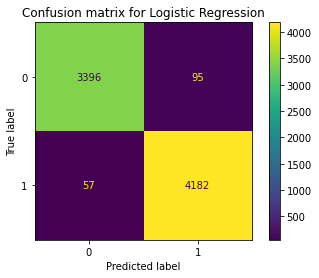

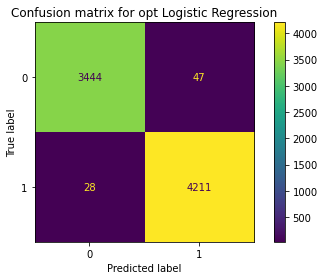

In [ ]:
plot_confusion_matrix(LR, xv_test, y_test)  
plt.title('Confusion matrix for Logistic Regression')

plot_confusion_matrix(optimizer_LR, xv_test, y_test)  
plt.title('Confusion matrix for opt Logistic Regression')

plt.tight_layout()  

plt.show()

###Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)
y_fitted = DT.predict(xv_test)


In [ ]:
DTscore = metrics.accuracy_score(y_test,y_fitted)
print("Decision Tree accuracy:  %0.4f" %DTscore)

Decision Tree accuracy:  0.9928


In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3491
           1       0.99      1.00      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



###Decision Tree - grid search for best parameters

In [ ]:
model = DecisionTreeClassifier()
param_grid = {"criterion": ['gini', 'entropy', 'log_loss'],
              "max_depth": [5, 10, 100],
              "max_features": ['int', 'sqrt', 'log2']
              }

In [ ]:
optimizer_DT = GridSearchCV(model, param_grid, cv=10, scoring="accuracy", n_jobs = -1)

In [ ]:
optimizer_DT.fit(xv_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 282, in fit
    "Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string value

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 100],
                         'max_features': ['int', 'sqrt', 'log2']},
             scoring='accuracy')

In [ ]:
optimizer_DT.best_params_

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt'}

In [ ]:
y_fitted = optimizer_DT.predict(xv_test)
opt_DTscore = metrics.accuracy_score(y_test,y_fitted)
print("Decision Tree Optmize param. accuracy: %0.4f" %opt_DTscore)

Decision Tree Optmize param. accuracy: 0.8312


In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3491
           1       0.85      0.84      0.85      4239

    accuracy                           0.83      7730
   macro avg       0.83      0.83      0.83      7730
weighted avg       0.83      0.83      0.83      7730



**Confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


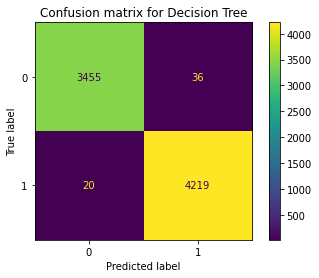

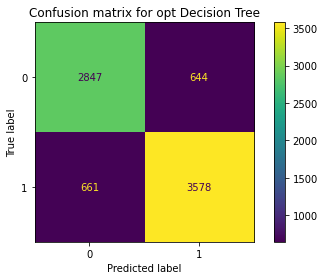

In [ ]:
plot_confusion_matrix(DT, xv_test, y_test)  
plt.title('Confusion matrix for Decision Tree')

plot_confusion_matrix(optimizer_DT, xv_test, y_test)  
plt.title('Confusion matrix for opt Decision Tree')

plt.tight_layout()  

plt.show()

###Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators=100,random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_fitted = RF.predict(xv_test)

In [ ]:
RFscore = metrics.accuracy_score(y_test,y_fitted)
print("Random Forest accuracy:  %0.4f" %RFscore)

Random Forest accuracy:  0.9836


###Random Forest - grid search for best parameters

In [ ]:
model = RandomForestClassifier()

param_grid = {"n_estimators": [10, 100], 
             "min_samples_leaf": [1, 5, 10],
             "max_samples": [0.75, 1]}

In [ ]:
optimizer_RF = GridSearchCV(model, param_grid, cv=10, scoring="accuracy", n_jobs = -1)

In [ ]:
optimizer_RF.fit(xv_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_samples': [0.75, 1],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [10, 100]},
             scoring='accuracy')

In [ ]:
optimizer_RF.best_params_

{'max_samples': 0.75, 'min_samples_leaf': 1, 'n_estimators': 100}

In [ ]:
y_fitted = optimizer_RF.predict(xv_test)
opt_RFscore = metrics.accuracy_score(y_test,y_fitted)
print("Random Forest Optmize param. accuracy: %0.4f" %opt_RFscore)

Random Forest Optmize param. accuracy: 0.9810


In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3491
           1       0.98      0.99      0.98      4239

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



**Confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


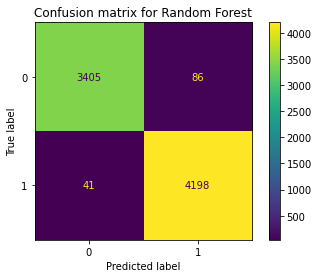

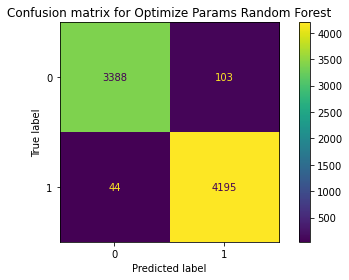

In [ ]:
plot_confusion_matrix(RF, xv_test, y_test)  
plt.title('Confusion matrix for Random Forest')

plot_confusion_matrix(optimizer_RF, xv_test, y_test)  
plt.title('Confusion matrix for Optimize Params Random Forest')

plt.tight_layout()  

plt.show()

###Support Vector Machines

In [ ]:
from sklearn import model_selection, naive_bayes, svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(xv_train,y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_fitted = SVM.predict(xv_test)

In [ ]:
SVMscore = metrics.accuracy_score(y_test,y_fitted)
print("SVM accuracy:  %0.4f" %SVMscore)

SVM accuracy:  0.9890


In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3491
           1       0.99      0.99      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



### SVM - grid search for best parameters

In [ ]:
model =SVC()
param_grid = {
    "C":[1,10],
    "gamma":[0.001, 0.01, 0.1],
    "kernel":['linear','rbf']
    }

In [ ]:
optimizer_SVC = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
optimizer_SVC.fit(xv_train, y_train)

In [ ]:
optimizer_SVC.best_params_

In [ ]:
y_fitted = optimizer_SVC.predict(xv_test)

In [ ]:
opt_SVCscore = metrics.accuracy_score(y_test,y_fitted)
print("Support Vector Classification Optmize param. accuracy: %0.4f" %opt_DTscore)

In [ ]:
print(classification_report(y_test, y_fitted))

### **Naive Bayes**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
model = MultinomialNB()

param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] 
             }

In [ ]:
optimizer_NB = GridSearchCV(model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)

In [ ]:
optimizer_NB.fit(xv_train, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [ ]:
optimizer_NB.best_params_

{'alpha': 0.01}

In [ ]:
y_fitted = optimizer_NB.predict(xv_test)

In [ ]:
opt_NBscore = metrics.accuracy_score(y_test,y_fitted)
print("Naive Bayes Classification Optmize param. accuracy: %0.4f" %opt_NBscore)

Naive Bayes Classification Optmize param. accuracy: 0.9305


###**Boosting - Ada Boost**

For the classification, one of the ensemble methods was also used - the Adaptive Boosting method, in which a Decision Tree Classifier was applied.

In [ ]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(xv_train,y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=5, random_state=1)

In [ ]:
Adab.fit(xv_train,y_train)
y_fitted = Adab.predict(xv_test)

In [ ]:
ABscore = metrics.accuracy_score(y_test,y_fitted)
print("accuracy: %0.4f" %ABscore)

accuracy: 0.9924


In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3491
           1       0.99      0.99      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



### **Bagging - Decision Tree Classfier**


When comparing the classification methods, the bagging method was also taken into account (as in the case of Ada Boost, the decision tree classifier was used).

In [ ]:
# loop to save and compare the results for N-estimators (the number of classifiers used in bagging) - alternatively to the parameter grid with one variable parameter
accuracies = []
N_estimators = [3,5,10, 25]
for n_trees in N_estimators:
    model = BaggingClassifier(DecisionTreeClassifier(),n_trees, max_samples=1.0, max_features=1.0,)                       
    model.fit(xv_train, y_train)
    accuracies.append(metrics.accuracy_score(y_test, model.predict(xv_test)))

In [ ]:
Bagging_score =  metrics.accuracy_score(y_test, y_fitted)

In [ ]:
print("accuracy: %0.4f" %Bagging_score)

accuracy: 0.9924


In [ ]:
print(classification_report(y_test, y_fitted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3491
           1       0.99      0.99      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



## Results comparison

In [ ]:
# dictionary of model results
results_dict = {
"Logistic_Regression": 0.9784,
"Logitistic_Regression_best_params": 0.9880,
"Decision_Tree": 0.9305,
"Decision_Tree_best_params": 0.8164,
"Random_Forest": 0.9788,
"Random_Forest_best_params": 0.9794,
"SVM": 0.9890,
"Naive_Bayes_best_params" : 0.9305,
"Ada_Boost Classifier":0.9924,
"Bagging_Decision_Tree": 0.9924
}


df = pd.DataFrame(list(results_dict.items()), columns = ['Model','Results_Accuracy'])

df

Model  Results_Accuracy
0                Logistic_Regression            0.9784
1  Logitistic_Regression_best_params            0.9880
2                      Decision_Tree            0.9305
3          Decision_Tree_best_params            0.8164
4                      Random_Forest            0.9788
5          Random_Forest_best_params            0.9794
6                                SVM            0.9890
7            Naive_Bayes_best_params            0.9305
8               Ada_Boost Classifier            0.9924
9              Bagging_Decision_Tree            0.9924

* *Models presented as "model_best_params" are results of prediction using best parameters from grid search. If parameters applied in grid search where different than default models paramateres, then it is possible that model with default parameters value gives better results than model with parameters values from grid search.*

### Results bar plot

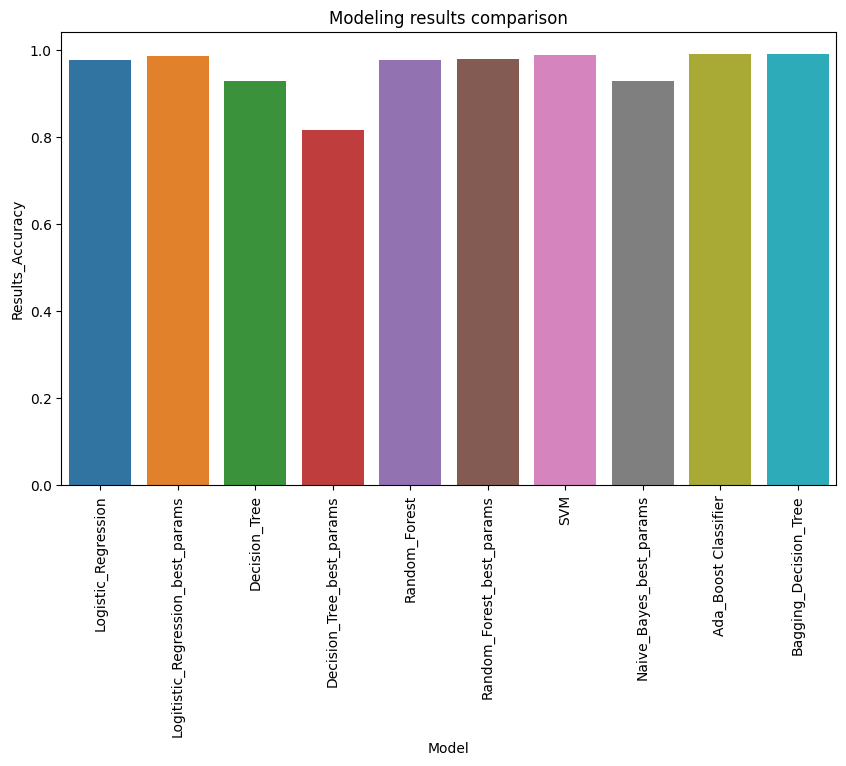

In [ ]:
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6),dpi=100)

plt.xticks(rotation=90)
plt.title("Modeling results comparison")
#groupedvalues = df.groupby('Model').sum().reset_index()
ax = sns.barplot(x=df['Model'], y=df['Results_Accuracy'])



# Conclusions

Apart from the decision tree, for which of the tested parameters the best allowed to achieve only about 81% accuracy, most of the models oscillated around 98-99%. The most effective method turned out to be the AdaBoost boosting method and Bagging Classifier, using the random tree classifier, which allowed achieving 99.24% accuracy. Already at the stage of exploration, there were noticeable differences in the characteristics of both classes - the length of the texts and the distribution of length, as well as the average number of words in the texts.